In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from util.utils import tradex_features, convert_df
import os
import pickle
import pandas_ta_classic as ta

symbol= 'BTC/USDT'
procent= 100


import os
import pandas as pd
import pickle

def _get_data(read_from_pickle=True, pickle_file_path='data/pickle/all/2h_data_all.pkl', csv_file_path='data/csv/all/30m_data_all.csv'):
    if read_from_pickle:
        if not os.path.exists(pickle_file_path):
            print('No pickle file found.')
            return pd.DataFrame()

        with open(pickle_file_path, 'rb') as f:
            data_ = pickle.load(f)

        if data_.empty:
            print("Loaded data is empty.")
            return pd.DataFrame()

        data = convert_df(data_)  # You need to define the convert_df function
    else:
        if not os.path.exists(csv_file_path):
            print('No CSV file found.')
            return pd.DataFrame()

        data = pd.read_csv(csv_file_path)

    if data.empty or data.isnull().values.any():
        print("Loaded data is empty or contains NaN values.")
        return pd.DataFrame()

    # Modify data as needed
    percentage_to_keep = procent / 100.0
    rows_to_keep = int(len(data) * percentage_to_keep)
    data = data.head(rows_to_keep)

    print(f'Dataframe shape: {data.shape}')
    return data



In [7]:
data = _get_data()

df = tradex_features(symbol,data)

filtered_df = df.loc[df['s_dots'] == 1]
display(df)


                               open      high       low     close  \
date                                                                
2020-01-01 00:00:00+00:00   7182.43   7225.00   7170.15   7210.24   
2020-01-01 02:00:00+00:00   7210.38   7239.74   7206.46   7221.65   
2020-01-01 04:00:00+00:00   7221.80   7225.41   7211.22   7220.31   
2020-01-01 06:00:00+00:00   7220.31   7230.00   7193.52   7205.26   
2020-01-01 08:00:00+00:00   7205.26   7206.29   7174.00   7184.45   
...                             ...       ...       ...       ...   
2023-09-26 14:00:00+00:00  26181.55  26214.99  26088.34  26126.66   
2023-09-26 16:00:00+00:00  26126.66  26295.99  26115.00  26175.01   
2023-09-26 18:00:00+00:00  26175.00  26275.72  26144.96  26247.70   
2023-09-26 20:00:00+00:00  26247.70  26288.68  26100.00  26165.40   
2023-09-26 22:00:00+00:00  26165.39  26240.00  26150.08  26221.67   

                                 volume  
date                                     
2020-01-01 00:00:0

UnboundLocalError: cannot access local variable 'processed_features' where it is not associated with a value

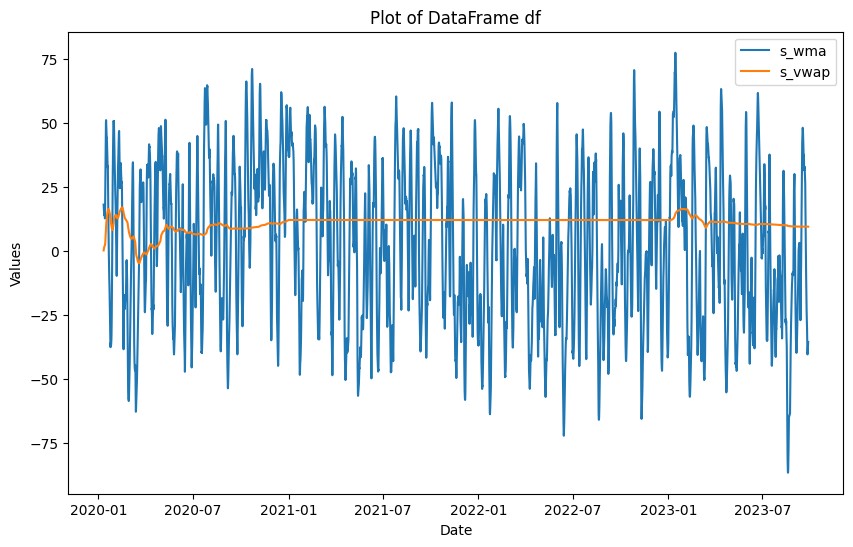

In [ ]:
import matplotlib.pyplot as plt

# Plot the columns of the DataFrame
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['s_wma'], label='s_wma')
plt.plot(df.index, df['s_vwap'], label='s_vwap')
# plt.plot(df.index, df['mfi'], label='mfi')
# plt.plot(df.index, df['mfi_sum'], label='mfi_sum')
# plt.plot(df.index, df['s_dots'], label='s_dots')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Plot of DataFrame df')
plt.show()
